# Space

How to measure the amount of space taken up by factorio machines

Also how to efficiently place machines.

1. How to measure the space taken up by a blueprint / module / set of machines
2. Given a particular blueprint, how to fit that inside given space constraints. For example, with a modular mining blueprint, how many of these bluebprints can be fit inside a particular patch of ore. 


Output for any ore patch should be 2 blue belts

Miner output is variable, so putting the output into chests gives a buffer and means the output between the miner chests and the train station chests is static


Fitting shapes into other shapes is called bin-packing: http://cgi.csc.liv.ac.uk/~epa/surveyhtml.html

Though bin packing appears to be more like different sized objects being fitted into a fix sized bin. 

The blueprint size will always be the same, just tiled. Maybe tessellation?

```

Stone wall = [1,1]

Assembling machine 3 = [3,3]

Electric Furnace = [3,3]

Steam Turbine = [3,5]

Heat pipe = [1,1]

Substation = [2,2]

Big electric pole = [2,2]

Medium electric pole = [1,1]

Belts = [1,1]

Splitters = [1,2]

Inserters = [1,1]

Rail = [2,2]

Train stuff = [2,6]

Laser Turret = [2,2]

Solar panel = [3,3]

Accumulator = [2,2]

Centrifuge = [3,3]

Chemical plant = [3,3]

Oil refinery = [5,5]

Pump = [1,2]

Nuclear reactor = [5,5]

Electric mining drill = [3,3]

Storage tank = [3,3]

```

```

Laser turret fire radius = 23
from edge of turrets side

     23
     |
23 - 2,2 - 23
     |
     23

```

so a diameter of 24 then lolwtf


Use matplotlib patches to draw this layout

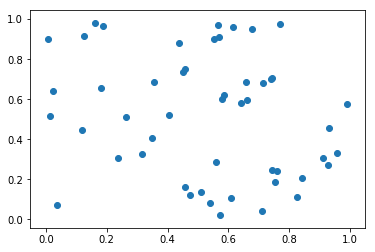

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(x, y)
plt.show()

Example ore patch co-ordinates:

```
[(,)(,)

```

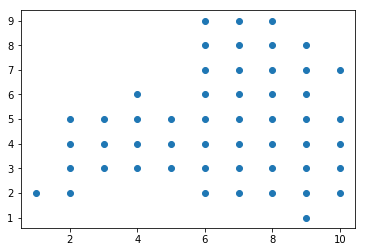

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

li = [
    (1,2),
    (2,2),(2,3),(2,4),(2,5),
    (3,3),(3,4),(3,5),
    (4,3),(4,4),(4,5),(4,6),
    (5,3),(5,4),(5,5),
    (6,2),(6,3),(6,4),(6,5),(6,6),(6,7),(6,8),(6,9),
    (7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
    (8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
    (9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),
    (10,2),(10,3),(10,4),(10,5),(10,7),
  ]
#li = [(1,2),(2,2),(9,1)]


xs = [x[0] for x in li]
ys = [x[1] for x in li]

plt.scatter(xs, ys)

plt.show()

Mining blueprint:

4 miners (each with 2 x Eff3) all pointed towards centre

From bottom of middle:
- blue belt
- underground belt start
- medium electric pole
- underground belt stop
- blue belt to end of miner

Furnace blueprint:

- 8 furnaces (each with 2 x Eff3) all pointed towards centre
- 3 lanes of blue belts. 2 on outside with ore, output from furnace onto one belt in middle
- Blue inserters belt and furnace
- electrical substation in centre

- Mining blueprint takes up `[6,7]` of space
- Furnace blueprint takes up `[13,12]` of space

Use the Shoelace formula: https://en.wikipedia.org/wiki/Shoelace_formula